In [4]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

### Подготовка данных

In [5]:
#PATH_DATA = './data/data_part.json'
PATH_DATA = './data/data.json'
TRAIN_PERCENT = 10
Y_COLUMN = 'TVShow'
X_COLUMN = 'Text'

In [6]:
dataRead = []
with open(PATH_DATA, 'r', encoding='utf-8') as jsonfile:    
    dataRead = json.load(jsonfile)
    
data_all = pd.DataFrame(data=dataRead, columns = [Y_COLUMN, X_COLUMN])
data_positive = pd.DataFrame(data=data_all.loc[data_all[Y_COLUMN] == 1])
data_negative = pd.DataFrame(data=data_all.loc[data_all[Y_COLUMN] == 0])

data_all.shape, data_positive.shape, data_negative.shape

((5336, 2), (549, 2), (4787, 2))

In [7]:
data_all.head()

,TVShow,Text
0,0,мужчин актер съемок клип съемк клип ищ геро му...
1,0,вниман москв т взлет ориентировочн девушк лет ...
2,0,х ф данил козловск пада аист мужчин лет рост р...
3,0,нов шанс попаст кастинг супер телевикторин уга...
4,0,кастинг июл девушек размер одежд парн работ ию...


In [8]:
data_all.head(), data_positive.head(), data_negative.head(), 

(   TVShow                                               Text
 0       0  мужчин актер съемок клип съемк клип ищ геро му...
 1       0  вниман москв т взлет ориентировочн девушк лет ...
 2       0  х ф данил козловск пада аист мужчин лет рост р...
 3       0  нов шанс попаст кастинг супер телевикторин уга...
 4       0  кастинг июл девушек размер одежд парн работ ию...,
      TVShow                                               Text
 41        1  август москв вегас фина призов фонд рубл разыг...
 44        1  молод активн амбициозн свободн комплекс свобод...
 51        1  яхт любв топов холостяк легендарн проект дом к...
 53        1  информац парн лет ищ геро нов ярк приключенчес...
 635       1  крокус сит состо сь мка концерт финальн отборо...,
    TVShow                                               Text
 0       0  мужчин актер съемок клип съемк клип ищ геро му...
 1       0  вниман москв т взлет ориентировочн девушк лет ...
 2       0  х ф данил козловск пада аист мужчин лет рост

In [9]:
data = pd.DataFrame()
data = data.append(data_positive.sample(n=200))
data = data.append(data_negative.sample(n=30))

data = shuffle(data)
data.head()

,TVShow,Text
2126,1,срочн москв мо нов шо люд город тип игр маф ну...
4860,1,вниман кастинг москв шо суд дел несовершенноле...
4851,1,хочеш приня участ телепроект дом попаст остр л...
2012,1,москв срочн декабр обязательн об дня музыкальн...
2579,1,шо регин запуска сезон снов поиск деток рубрик...


In [10]:
data_x = data[X_COLUMN]
data_y = data[Y_COLUMN]
data_x.shape, data_y.shape

((230,), (230,))

##### Разделение данных на train_x,train_y и test_x,test_y

In [11]:
TRAIN_PERCENT = 70
delimiter = int(len(data_y) * TRAIN_PERCENT / 100)

train_x = data_x[:delimiter]
test_x = data_x[delimiter:]
train_y = data_y[:delimiter]
test_y = data_y[delimiter:]

### Логистическая регрессия с преобразование текста CountVectorizer

In [12]:
model_vectorizer = CountVectorizer()
vectorizer = model_vectorizer.fit(train_x)
feature_names = model_vectorizer.get_feature_names()

In [13]:
train_x

2126    срочн москв мо нов шо люд город тип игр маф ну...
4860    вниман кастинг москв шо суд дел несовершенноле...
4851    хочеш приня участ телепроект дом попаст остр л...
2012    москв срочн декабр обязательн об дня музыкальн...
2579    шо регин запуска сезон снов поиск деток рубрик...
                              ...                        
4252    октябр запланирова бизнес мероприят формат пре...
3946    москв питер вниман кастинг профессиональн танц...
2123    москв треб зрител сь мку развлекательн шо дека...
3482    ищ мужчин участ шо бал холостяк стиляг москв у...
4690    элитн ночн клуб москв треб танцовщиц оп работ ...
Name: Text, Length: 161, dtype: object

##### Подготовка данных

In [14]:
train_x = pd.DataFrame(data=vectorizer.transform(train_x).toarray(), columns=feature_names)
train_y = train_y 

test_x = pd.DataFrame(data=vectorizer.transform(test_x).toarray(), columns=feature_names)
test_y = test_y

In [15]:
train_x

,абонемент,абсолютн,автобус,автомобил,авторск,агапкин,агент,агентск,агентств,агличанин,...,юрист,ютуб,яв,явля,язык,яковлев,январ,яндексдиск,япон,ярк
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
%%time
logit = LogisticRegression(random_state=17, solver='liblinear')
logit.fit(train_x, train_y)

CPU times: user 5.78 ms, sys: 1.98 ms, total: 7.77 ms
Wall time: 7.39 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=17, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Анализ модели

##### Доли правильных ответов на обучающей и тестовой выборках

In [17]:
round(logit.score(train_x, train_y), 3), round(logit.score(test_x, test_y), 3),

(1.0, 0.928)

In [18]:
valid_pred = logit.predict_proba(test_x)[:,1]
roc_auc = roc_auc_score(test_y, valid_pred)
print('Качество модели относительно тестовой выборки: ' + str(roc_auc))

Качество модели относительно тестовой выборки: 0.9101382488479263


##### Коэффициенты модели

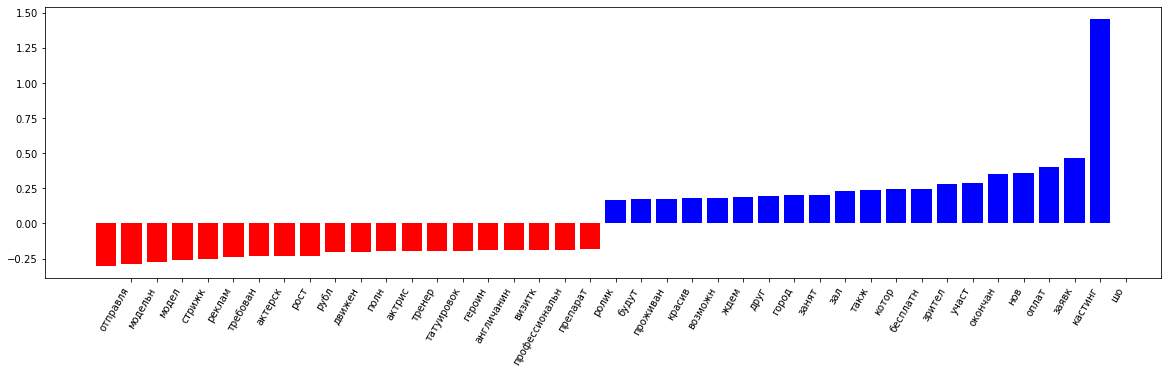

In [19]:
n_top_features = 20
# get coefficients with large absolute values 
coef = logit.coef_.ravel()
positive_coefficients = np.argsort(coef)[-n_top_features:]
negative_coefficients = np.argsort(coef)[:n_top_features]
interesting_coefficients = np.hstack([negative_coefficients, positive_coefficients])

# plot them
plt.figure(figsize=(20, 5))
colors = ["red" if c < 0 else "blue" for c in coef[interesting_coefficients]]
plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * n_top_features), feature_names[interesting_coefficients], rotation=60, ha="right");

In [20]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

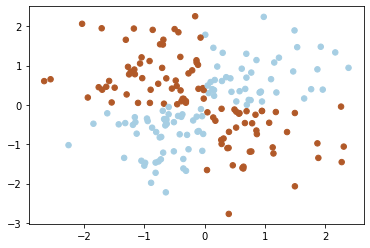

In [21]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [22]:
n_top_features = 40
coef = logit.coef_.ravel() #Функция ravel() возвращает сжатый до одной оси массив.
coefficients = np.argsort(coef)
coefficients = coefficients[-n_top_features:]
coefficients = coefficients[::-1]
feature_names[interesting_coefficients]

index = 0
print("Слова и коэффициенты с большими абсолютными значениями:")
for c in coefficients:
    index = index + 1
    name = feature_names[c]
    print(str(index) + " - " + name + " (" + str(c) + ")")



Слова и коэффициенты с большими абсолютными значениями:
1 - шо (2340)
2 - кастинг (710)
3 - заявк (581)
4 - оплат (1184)
5 - нов (1096)
6 - окончан (1171)
7 - участ (2217)
8 - зрител (608)
9 - бесплатн (83)
10 - котор (807)
11 - такж (2036)
12 - зал (545)
13 - занят (550)
14 - город (329)
15 - друг (461)
16 - ждем (487)
17 - возможн (224)
18 - красив (813)
19 - проживан (1602)
20 - будут (128)
21 - участник (2220)
22 - лс (878)
23 - всем (251)
24 - руб (1768)
25 - кажд (688)
26 - тнт (2111)
27 - мужчин (992)
28 - дне (421)
29 - реалит (1706)
30 - указа (2175)
31 - месяц (940)
32 - связ (1813)
33 - жизн (509)
34 - вопрос (237)
35 - укаж (2174)
36 - судебн (2001)
37 - состо (1923)
38 - пиш (1330)
39 - форм (2254)
40 - табличк (2032)


### Првоерка модели на данных 

In [25]:
texts = [
    "Требуется актер для съемки в кино ...", 
    "тв шоу для актеров ...",
    "съемка для тв кулинарное шоу требуются ...",
]
result_x = train_x = pd.DataFrame(data=vectorizer.transform(texts).toarray(), columns=feature_names)
result = logit.predict_proba(result_x)
print("Вероятность - текст")
for i in range(0, len(texts)):
    print(str(result[i][1]) + " : " + texts[i])

Вероятность - текст
0.46227402738867546 : Требуется актер для съемки в кино ...
0.4748771329513087 : тв шоу для актеров ...
0.4748771329513087 : съемка для тв кулинарное шоу требуются ...
